In [1]:
##Predict if patients could be diagnosed with a hyperthyroid or hypothyroid condition

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import datetime
import os
import collections

import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, precision_recall_curve,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (cross_validate, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold


import keras
from keras.callbacks import TensorBoard
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

from keras.utils.vis_utils import plot_model

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [4]:
dataset_file = "/content/drive/MyDrive/506/Final Project/thyroid_preprocessed.csv"
df = pd.read_csv(dataset_file)
df.shape

(8624, 29)

In [5]:
pd.set_option('display.max_columns', None)
df

,age_group,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,FTI_measured,FTI,TBG_measured,TBG,diagnosis_name,avg_value
0,1.0,18,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.50,1,2.7,1,131.0,1,149.0,0,0.0,none,0.0
1,1.0,18,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.25,1,2.5,1,269.0,1,165.0,0,0.0,none,0.0
2,1.0,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.33,0,0.0,1,154.0,1,179.0,0,0.0,none,0.0
3,1.0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,1,2.4,1,86.0,1,85.0,0,0.0,none,0.0
4,1.0,18,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.50,0,0.0,1,116.0,1,111.0,0,0.0,none,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,8.0,95,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.60,0,0.0,1,98.0,1,108.0,0,0.0,none,0.0
8620,8.0,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.40,1,0.4,1,54.0,1,87.0,0,0.0,none,0.0
8621,8.0,97,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.20,1,1.3,1,84.0,1,87.0,0,0.0,none,0.0
8622,8.0,97,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.90,1,0.5,1,101.0,1,158.0,0,0.0,none,0.0


In [6]:
##distribution of diagnosis

In [7]:
distribution = df['diagnosis_name'].value_counts()
print(distribution)

none                       7907
compensated hypothyroid     335
primary hypothyroid         220
hyperthyroid                135
T3 toxic                     19
toxic goitre                  6
secondary toxic               1
hypothyroid                   1
Name: diagnosis_name, dtype: int64


In [8]:
#df['diagnosis_name'] = df['diagnosis_name'].map({'none': 1, 'compensated hypothyroid': 2, 'primary hypothyroid': 3, 'hyperthyroid': 4, 'T3 toxic': 5, 'toxic goitre': 6, 'secondary toxic': 7, 'hypothyroid': 8})
df = df.drop(df[df['diagnosis_name'] == 'none'].index)
df

,age_group,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,FTI_measured,FTI,TBG_measured,TBG,diagnosis_name,avg_value
11,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,440.00,1,0.5,1,24.0,1,18.0,0,0.0,primary hypothyroid,0.0
14,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12.00,0,0.0,1,142.0,1,104.0,0,0.0,compensated hypothyroid,0.0
19,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12.00,1,2.2,1,94.0,1,98.0,0,0.0,compensated hypothyroid,0.0
32,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.25,1,3.1,1,160.0,1,177.0,0,0.0,hyperthyroid,0.0
36,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,41.00,0,0.0,1,118.0,1,105.0,0,0.0,compensated hypothyroid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,7.0,87,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,176.00,0,0.0,1,52.0,1,42.0,0,0.0,primary hypothyroid,0.0
8560,7.0,88,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,7.90,1,1.9,1,47.0,1,44.0,0,0.0,primary hypothyroid,0.0
8568,7.0,88,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13.00,0,0.0,1,123.0,1,124.0,0,0.0,compensated hypothyroid,0.0
8586,7.0,89,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,14.00,0,0.0,0,0.0,0,0.0,0,0.0,primary hypothyroid,0.0


In [9]:
data = ['hyperthyroid',
        'T3 toxic',
        'toxic goitre',
        'secondary toxic',
        'hypothyroid', 
        'primary hypothyroid', 
        'compensated hypothyroid',
        'secondary hypothyroid']

df['diagnosis_num'] = np.where(df['diagnosis_name'].isin(['hyperthyroid',
                                                          'T3 toxic',
                                                          'toxic goitre',
                                                          'secondary toxic']), 1,
                               np.where(df['diagnosis_name'].isin(['hypothyroid',
                                                          'primary hypothyroid',
                                                          'compensated hypothyroid',
                                                          'secondary hypothyroid']), 2,
                                        np.nan))

In [10]:
data = ['hypothyroid', 'primary hypothyroid', 'compensated hypothyroid', 'secondary hypothyroid']

df['hypo_num'] = np.where(df['diagnosis_name'].isin(data), 
                          np.where(df['diagnosis_name'] == 'hypothyroid', 1,
                                   np.where(df['diagnosis_name'] == 'primary hypothyroid', 2,
                                            np.where(df['diagnosis_name'] == 'compensated hypothyroid', 3,
                                                     np.where(df['diagnosis_name'] == 'secondary hypothyroid', 4, np.nan)))), 
                          np.nan)

df['hypo_num'] = np.where(df['hypo_num'].isnull(), 0, df['hypo_num'])

In [11]:
new_order = ['age_group', 
             'age', 
             'sex', 
             'on_thyroxine', 
             'query_on_thyroxine', 
             'on_antithyroid_meds', 
             'sick', 
             'pregnant', 
             'thyroid_surgery', 
             'I131_treatment', 
             'query_hypothyroid', 
             'query_hyperthyroid', 
             'lithium', 
             'goitre', 
             'tumor', 
             'hypopituitary', 
             'psych', 
             'TSH_measured', 
             'TSH', 
             'T3_measured', 
             'T3', 
             'TT4_measured', 
             'TT4', 
             'FTI_measured', 
             'FTI', 
             'TBG_measured', 
             'TBG', 
             'diagnosis_num', 
             'hypo_num', 
             'diagnosis_name', 
             'avg_value']
df = df.reindex(columns = new_order)
df

,age_group,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,FTI_measured,FTI,TBG_measured,TBG,diagnosis_num,hypo_num,diagnosis_name,avg_value
11,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,440.00,1,0.5,1,24.0,1,18.0,0,0.0,2.0,2.0,primary hypothyroid,0.0
14,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12.00,0,0.0,1,142.0,1,104.0,0,0.0,2.0,3.0,compensated hypothyroid,0.0
19,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12.00,1,2.2,1,94.0,1,98.0,0,0.0,2.0,3.0,compensated hypothyroid,0.0
32,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.25,1,3.1,1,160.0,1,177.0,0,0.0,1.0,0.0,hyperthyroid,0.0
36,1.0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,41.00,0,0.0,1,118.0,1,105.0,0,0.0,2.0,3.0,compensated hypothyroid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,7.0,87,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,176.00,0,0.0,1,52.0,1,42.0,0,0.0,2.0,2.0,primary hypothyroid,0.0
8560,7.0,88,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,7.90,1,1.9,1,47.0,1,44.0,0,0.0,2.0,2.0,primary hypothyroid,0.0
8568,7.0,88,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13.00,0,0.0,1,123.0,1,124.0,0,0.0,2.0,3.0,compensated hypothyroid,0.0
8586,7.0,89,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,14.00,0,0.0,0,0.0,0,0.0,0,0.0,2.0,2.0,primary hypothyroid,0.0


In [12]:
distribution = df['diagnosis_name'].value_counts()
print(distribution)

compensated hypothyroid    335
primary hypothyroid        220
hyperthyroid               135
T3 toxic                    19
toxic goitre                 6
secondary toxic              1
hypothyroid                  1
Name: diagnosis_name, dtype: int64


In [13]:
##features extracted for the models 

X_df = df.drop(['diagnosis_name', 'hypo_num', 'age_group', 'age', 'sex', 'avg_value'], axis = 1)
y_df = df['diagnosis_name']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 50)

In [14]:
X_train.shape, X_test.shape

((573, 25), (144, 25))

In [15]:
Counter(y_train), Counter(y_test)

(Counter({'primary hypothyroid': 182,
          'compensated hypothyroid': 260,
          'hyperthyroid': 109,
          'T3 toxic': 16,
          'toxic goitre': 6}),
 Counter({'T3 toxic': 3,
          'primary hypothyroid': 38,
          'compensated hypothyroid': 75,
          'hyperthyroid': 26,
          'secondary toxic': 1,
          'hypothyroid': 1}))

In [16]:
##performing a Decision Tree Classifier on the train/test split

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9861111111111112


In [17]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

               T3 toxic       1.00      1.00      1.00         3
compensated hypothyroid       1.00      1.00      1.00        75
           hyperthyroid       0.96      1.00      0.98        26
            hypothyroid       0.00      0.00      0.00         1
    primary hypothyroid       0.97      1.00      0.99        38
        secondary toxic       0.00      0.00      0.00         1

               accuracy                           0.99       144
              macro avg       0.66      0.67      0.66       144
           weighted avg       0.97      0.99      0.98       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

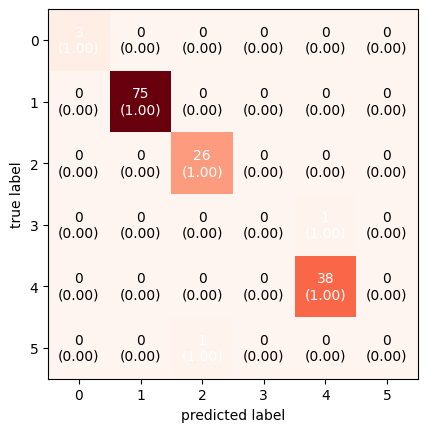

In [18]:
#performing a confusion matrix on the decision tree

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [19]:
##performing a random forest classifier on the train/test split

rfc = RandomForestClassifier(n_estimators = 50, random_state = 25)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=25)

In [20]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9861111111111112


In [21]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

               T3 toxic       1.00      1.00      1.00         3
compensated hypothyroid       1.00      1.00      1.00        75
           hyperthyroid       0.96      1.00      0.98        26
            hypothyroid       0.00      0.00      0.00         1
    primary hypothyroid       0.97      1.00      0.99        38
        secondary toxic       0.00      0.00      0.00         1

               accuracy                           0.99       144
              macro avg       0.66      0.67      0.66       144
           weighted avg       0.97      0.99      0.98       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

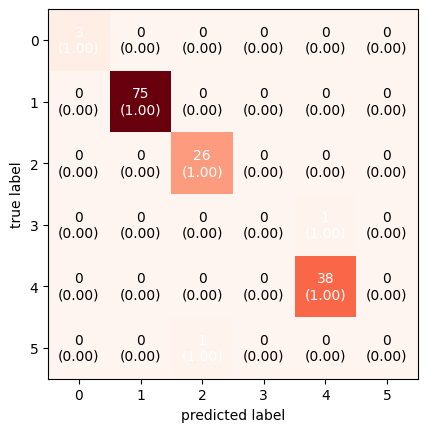

In [22]:
#performing a confusion matrix on the random forest

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [23]:
##feature importance

In [24]:
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

In [25]:
print("Feature ranking:")
cols = X_test.columns
for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], cols[indices[f]] ,importances[indices[f]]))

Feature ranking:
1. feature 21: FTI (0.325131)
2. feature 19: TT4 (0.259031)
3. feature 15: TSH (0.177935)
4. feature 24: diagnosis_num (0.087508)
5. feature 17: T3 (0.086363)
6. feature 20: FTI_measured (0.016579)
7. feature 11: tumor (0.009880)
8. feature 8: query_hyperthyroid (0.007308)
9. feature 0: on_thyroxine (0.007204)
10. feature 14: TSH_measured (0.004993)
11. feature 2: on_antithyroid_meds (0.004634)
12. feature 16: T3_measured (0.002890)
13. feature 18: TT4_measured (0.002454)
14. feature 7: query_hypothyroid (0.002215)
15. feature 5: thyroid_surgery (0.001812)
16. feature 3: sick (0.000958)
17. feature 13: psych (0.000927)
18. feature 1: query_on_thyroxine (0.000795)
19. feature 4: pregnant (0.000570)
20. feature 6: I131_treatment (0.000493)
21. feature 9: lithium (0.000312)
22. feature 22: TBG_measured (0.000008)
23. feature 23: TBG (0.000000)
24. feature 10: goitre (0.000000)
25. feature 12: hypopituitary (0.000000)


In [26]:
##performing a correlation matrix

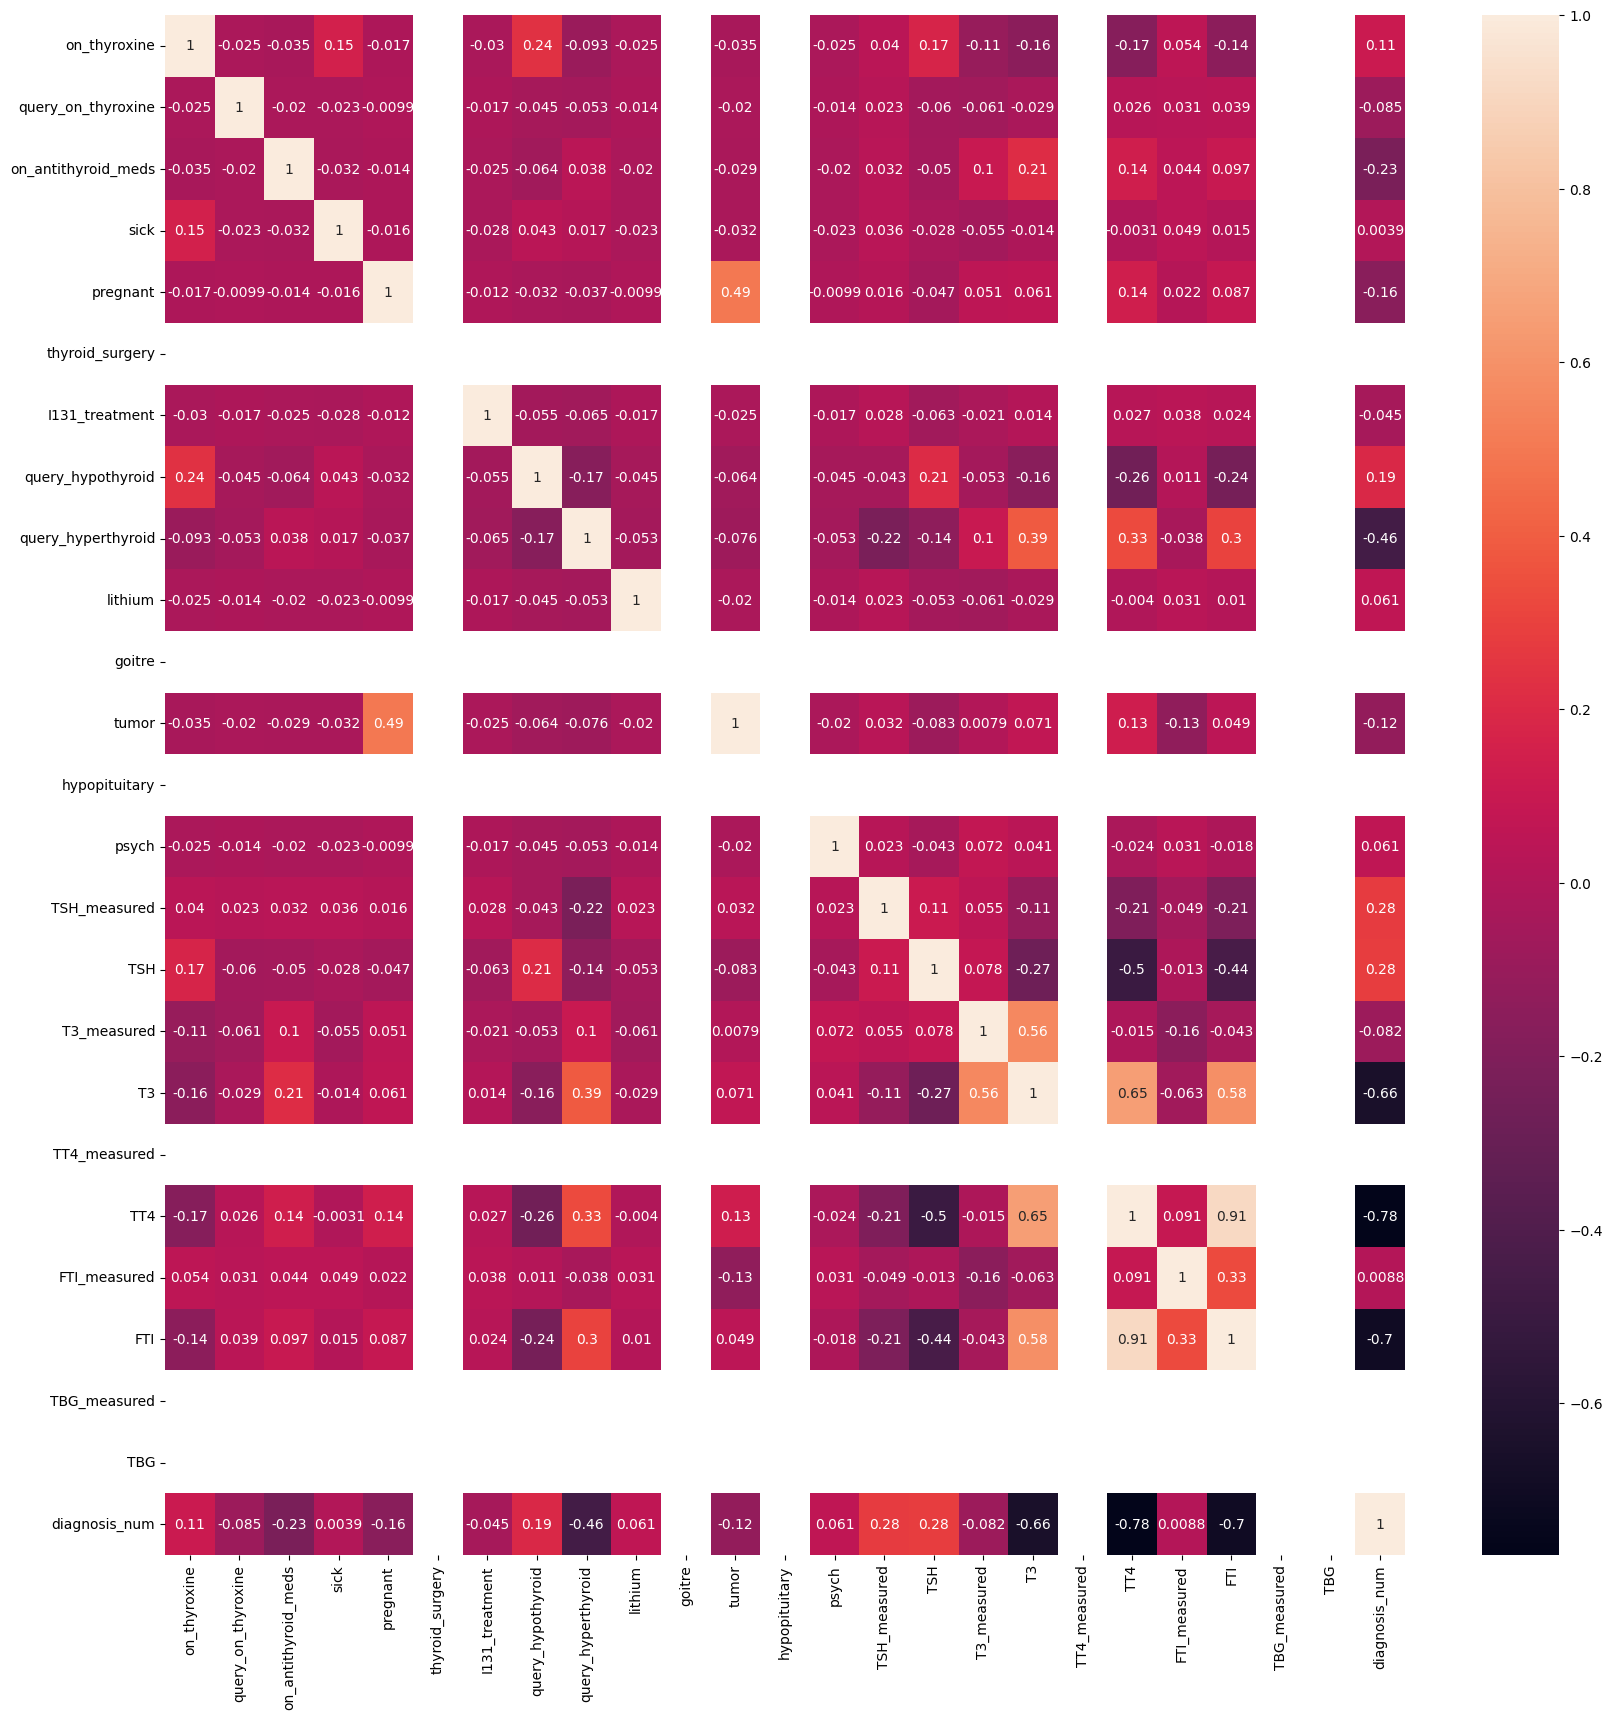

In [27]:
corr_matrix = X_test.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
##performing a logistic regression test on the train/test split

In [29]:
lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [30]:
y_pred = lr_model.predict(X_test)

accuracy = lr_model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9444444444444444


In [31]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

               T3 toxic       0.75      1.00      0.86         3
compensated hypothyroid       0.95      0.97      0.96        75
           hyperthyroid       1.00      0.96      0.98        26
            hypothyroid       0.00      0.00      0.00         1
    primary hypothyroid       0.92      0.92      0.92        38
        secondary toxic       0.00      0.00      0.00         1

               accuracy                           0.94       144
              macro avg       0.60      0.64      0.62       144
           weighted avg       0.93      0.94      0.94       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

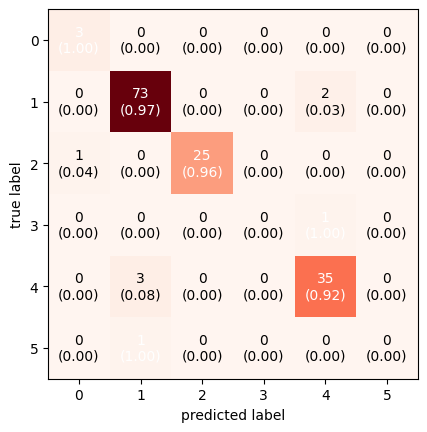

In [32]:
#performing a confusion matrix on the logistic regression

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [33]:
##focus on hypothyroidism

In [34]:
##features extracted for the models

X_df = df.drop(['diagnosis_name', 'diagnosis_num', 'hypo_num', 'age_group', 'age', 'sex', 'avg_value'], axis = 1)
y_df = df['hypo_num']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 50)

In [35]:
X_train.shape, X_test.shape

((501, 24), (216, 24))

In [36]:
Counter(y_train), Counter(y_test)

(Counter({0.0: 110, 2.0: 165, 3.0: 226}),
 Counter({0.0: 51, 2.0: 55, 3.0: 109, 1.0: 1}))

In [37]:
##performing a Decision Tree Classifier on the train/test split

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9907407407407407


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        51
         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00        55
         3.0       0.99      1.00      1.00       109

    accuracy                           0.99       216
   macro avg       0.74      0.75      0.74       216
weighted avg       0.99      0.99      0.99       216



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

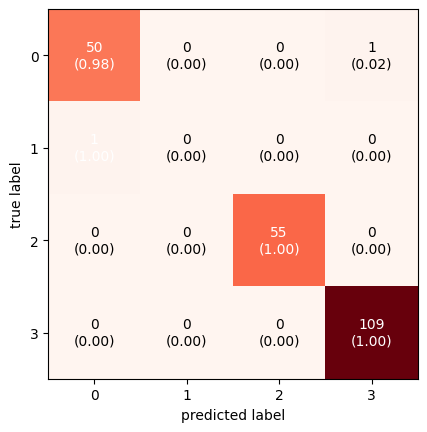

In [39]:
#performing a confusion matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [40]:
#performing a random forest classifier on the train/test split

rfc = RandomForestClassifier(n_estimators = 50, random_state = 25)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=25)

In [41]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9953703703703703


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       0.00      0.00      0.00         1
         2.0       0.98      1.00      0.99        55
         3.0       1.00      1.00      1.00       109

    accuracy                           1.00       216
   macro avg       0.75      0.75      0.75       216
weighted avg       0.99      1.00      0.99       216



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

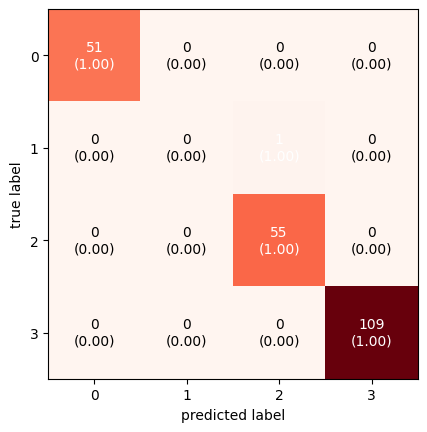

In [43]:
#performing a confusion matrix on the random forest

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [44]:
#feature importance

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
cols = X_test.columns
for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], cols[indices[f]] ,importances[indices[f]]))

Feature ranking:
1. feature 19: TT4 (0.286880)
2. feature 21: FTI (0.270531)
3. feature 15: TSH (0.237944)
4. feature 17: T3 (0.138263)
5. feature 8: query_hyperthyroid (0.017340)
6. feature 20: FTI_measured (0.014763)
7. feature 14: TSH_measured (0.007483)
8. feature 11: tumor (0.004780)
9. feature 0: on_thyroxine (0.004327)
10. feature 7: query_hypothyroid (0.003699)
11. feature 16: T3_measured (0.003494)
12. feature 18: TT4_measured (0.002016)
13. feature 5: thyroid_surgery (0.001922)
14. feature 2: on_antithyroid_meds (0.001351)
15. feature 13: psych (0.001233)
16. feature 3: sick (0.001014)
17. feature 1: query_on_thyroxine (0.000838)
18. feature 4: pregnant (0.000796)
19. feature 6: I131_treatment (0.000775)
20. feature 9: lithium (0.000382)
21. feature 23: TBG (0.000153)
22. feature 22: TBG_measured (0.000013)
23. feature 12: hypopituitary (0.000000)
24. feature 10: goitre (0.000000)


In [45]:
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9953703703703703


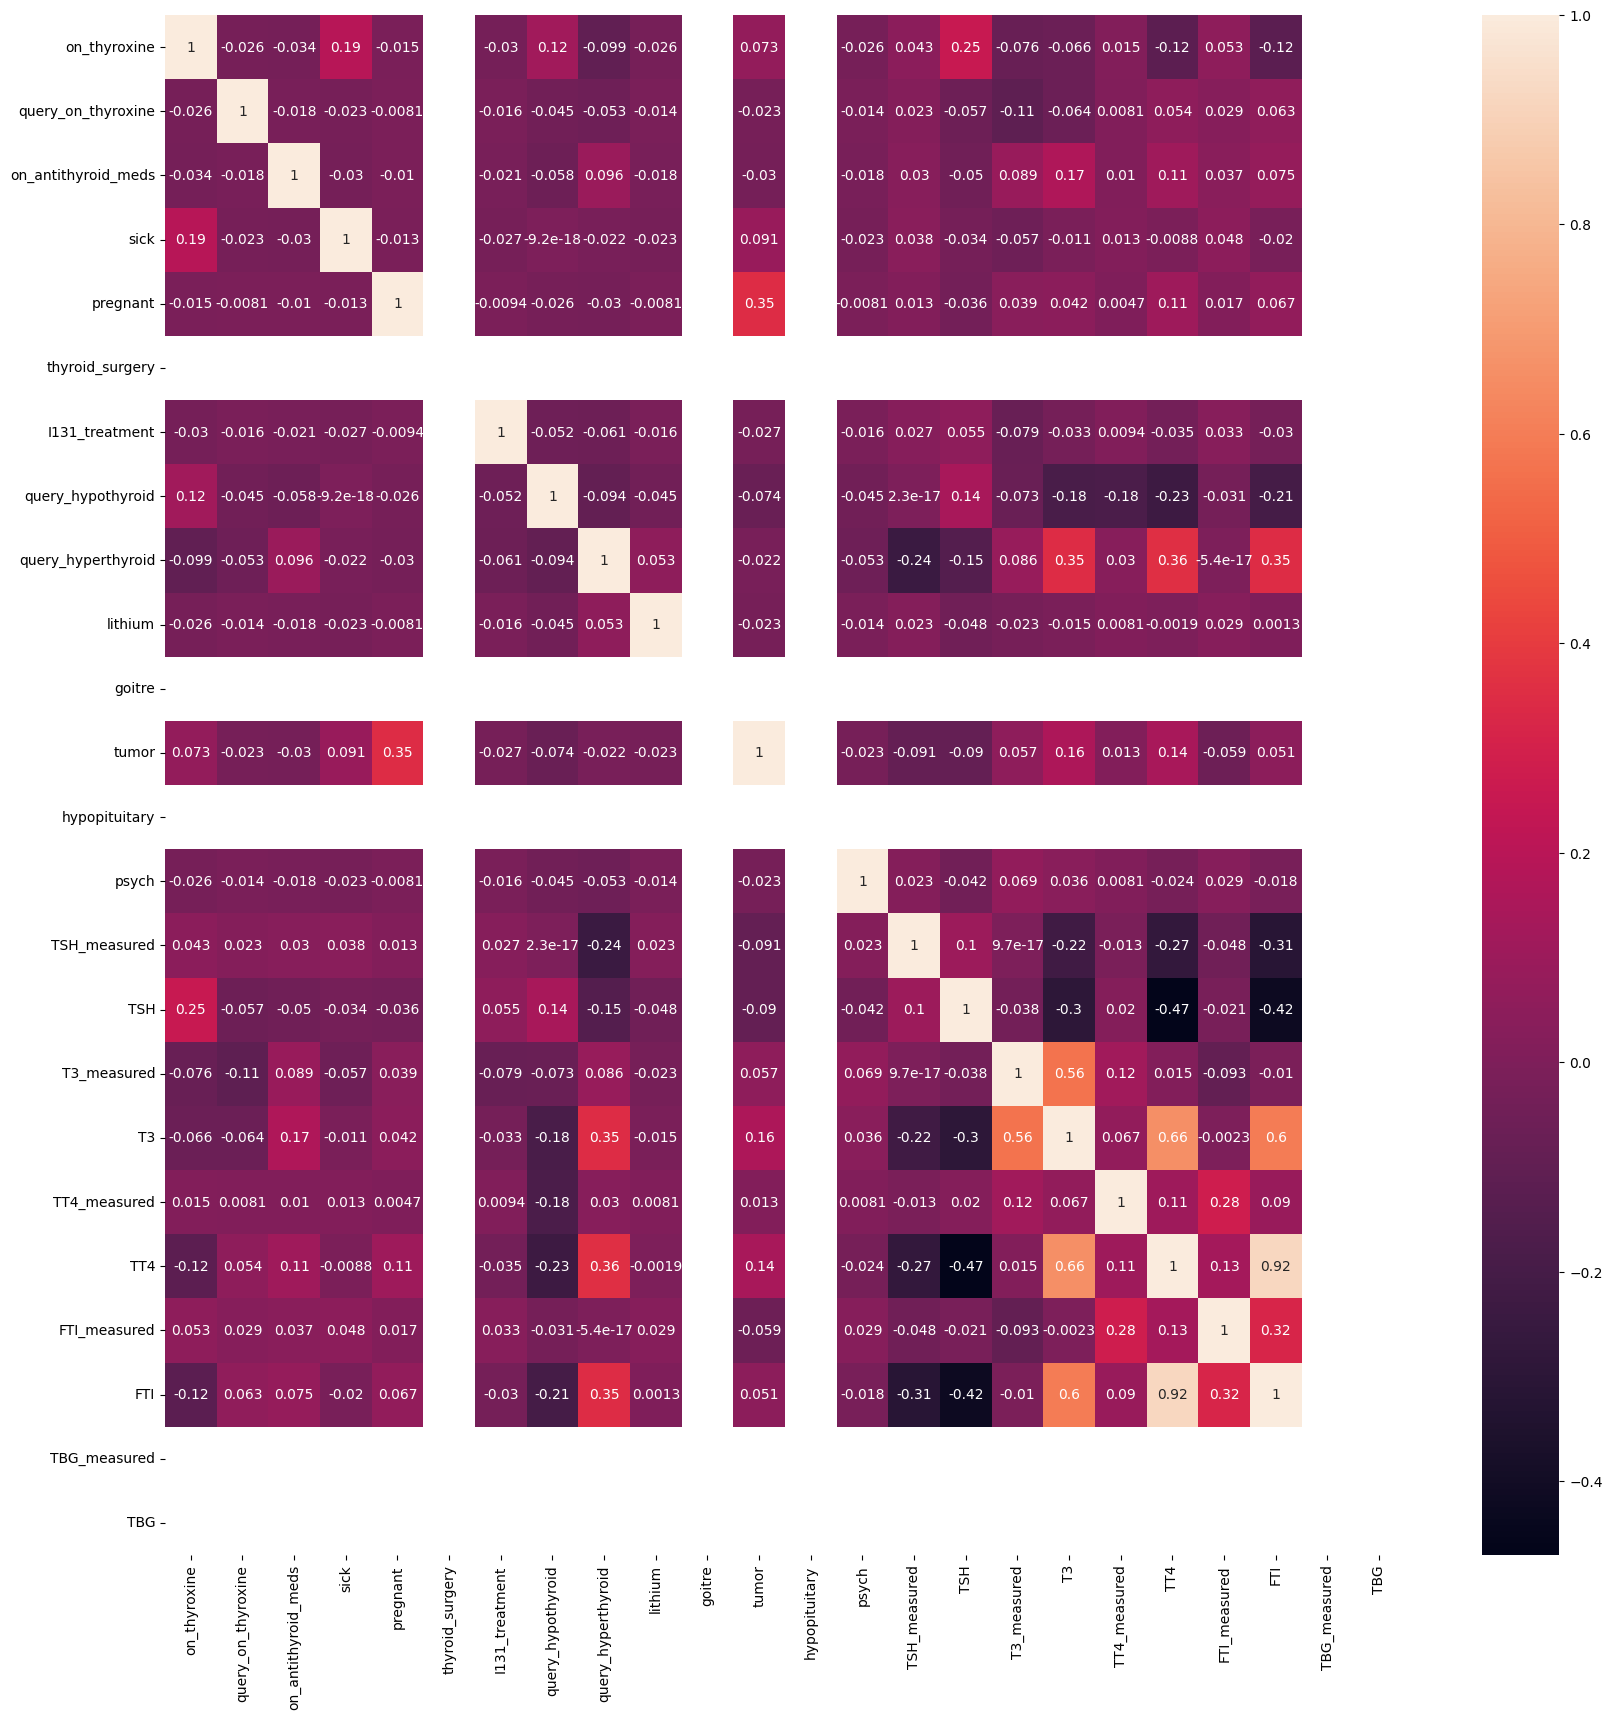

In [46]:
#performing a correlation matrix

corr_matrix = X_test.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [47]:
#performing a logistic regression test on the train/test split

lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [48]:
y_pred = lr_model.predict(X_test)

accuracy = lr_model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9583333333333334


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        51
         1.0       0.00      0.00      0.00         1
         2.0       0.94      0.91      0.93        55
         3.0       0.95      0.98      0.96       109

    accuracy                           0.96       216
   macro avg       0.72      0.72      0.72       216
weighted avg       0.95      0.96      0.96       216



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

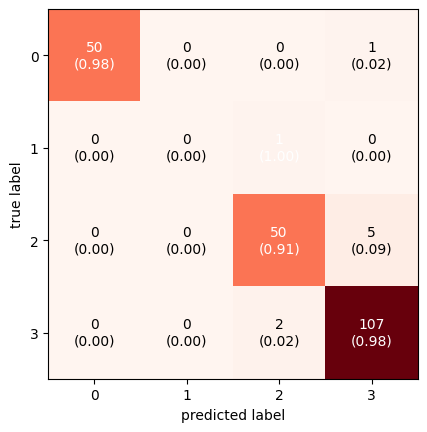

In [50]:
#performing a confusion matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')